# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q8"> 8. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q9"> 9. How does violent crime appear on the map?
><li><a href="#q10"> 10. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import warnings

# plt.style.use("fivethirtyeight")
plt.style.use("seaborn")
# plt.style.use("classic")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("crime_reports.csv")
# df = pd.read_csv("df_clean.csv")

# df.occurred_date = df.occurred_date.astype("datetime64")
# df.set_index(["occurred_date"], inplace=True)
# df.sort_index(inplace=True)

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306026 entries, 0 to 2306025
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21127
Address                             12
Zip Code                         14190
Council District                 47140
APD Sector                        9020
APD District                      9495
PRA                              10760
Census Tract                   1586026
Clearance Status                606493
Clearance Date                  337288
UCR Category                   1519093
Category Description           1519093
X-coordinate                     10177
Y-coordinate                     10177
Latitude                         38957
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2306021,20202300442,BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT,504,N,08/14/2020 01:37:00 AM,08/14/2020,137.0,08/17/2020 08:52:00 AM,08/17/2020,852.0,RESIDENCE / HOME,2223 WATERLOO CITY LN,78741.0,3.0,HE,2,441.0,NaN,N,09/23/2020,220,Burglary,3120595.0,3120595.0,30.241935,-97.723608,"(30.24193459, -97.72360831)"
2306022,20161610353,BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT,504,N,06/02/2016 12:00:00 AM,06/02/2016,0.0,06/09/2016 07:26:00 AM,06/09/2016,726.0,RESIDENCE / HOME,2220 E CESAR CHAVEZ ST,78702.0,3.0,CH,1,419.0,9.02,N,05/23/2017,220,Burglary,3121703.0,3121703.0,30.255624,-97.719728,"(30.25562371, -97.71972803)"
2306023,20193230787,BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT,504,N,11/19/2019 12:00:00 AM,11/19/2019,0.0,11/19/2019 01:24:00 PM,11/19/2019,1324.0,OTHER / UNKNOWN,5705 DIEHL TRL,78727.0,6.0,AD,3,183.0,NaN,N,12/19/2019,220,Burglary,3113542.0,3113542.0,30.434978,-97.740767,"(30.43497784, -97.74076728)"
2306024,2021221140,POSS CONTROLLED SUB/NARCOTIC,1800,N,01/22/2021 05:15:00 PM,01/22/2021,1715.0,01/22/2021 05:15:00 PM,01/22/2021,1715.0,HOTEL / MOTEL / ETC.,3017 S IH 35 SVRD NB,78741.0,3.0,HE,2,482.0,NaN,C,01/25/2021,NaN,NaN,3114042.0,3114042.0,30.226253,-97.744786,"(30.22625287, -97.74478642)"
2306025,20113131246,FAMILY DISTURBANCE,3400,N,11/09/2011 04:32:00 PM,11/09/2011,1632.0,11/09/2011 04:32:00 PM,11/09/2011,1632.0,RESIDENCE / HOME,2809 W WILLIAM CANNON DR,78745.0,5.0,FR,1,98.0,NaN,N,03/27/2012,NaN,NaN,3090895.0,3090895.0,30.207583,-97.818582,"(30.20758275, -97.81858198)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
df.duplicated().sum()

830

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## III. Exploratory Analysis

<a id='q1'></a>
### A. Question 1. What areas of Austin have the highest crime rates? 

78741.0    206992
78753.0    179213
78701.0    168527
78758.0    159613
78704.0    154887
78745.0    151027
78702.0    136894
78744.0    126496
78723.0    118603
78752.0     84590
78748.0     68249
78759.0     66465
78751.0     64156
78757.0     58025
78705.0     57194
78721.0     47797
78749.0     40492
78724.0     37718
78727.0     35940
78703.0     35234
78731.0     28708
78746.0     28156
78729.0     25319
78750.0     23775
78754.0     22897
Name: zip_code, dtype: int64

78741.0    0.090350
78753.0    0.078224
78701.0    0.073560
78758.0    0.069669
78704.0    0.067606
78745.0    0.065922
78702.0    0.059753
78744.0    0.055214
78723.0    0.051769
78752.0    0.036923
78748.0    0.029790
78759.0    0.029011
78751.0    0.028003
78757.0    0.025327
78705.0    0.024965
78721.0    0.020863
78749.0    0.017674
78724.0    0.016463
78727.0    0.015687
78703.0    0.015379
78731.0    0.012531
78746.0    0.012290
78729.0    0.011051
78750.0    0.010378
78754.0    0.009994
Name: zip_code, dtype: float64

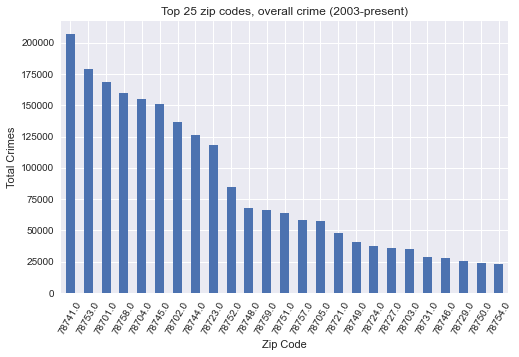

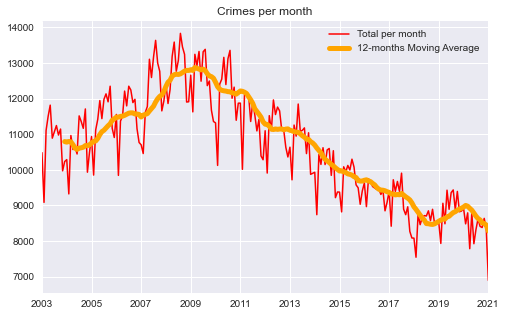

In [7]:
# Create and show dataframe for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 areas for crime
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Using resample 'M' and rolling window 12
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231170
THEFT                             211788
FAMILY DISTURBANCE                179510
CRIMINAL MISCHIEF                 127570
ASSAULT W/INJURY-FAM/DATE VIOL     78118
BURGLARY OF RESIDENCE              77116
DWI                                69635
PUBLIC INTOXICATION                68761
HARASSMENT                         64289
DISTURBANCE - OTHER                61638
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,PUBLIC INTOXICATION,ASSAULT W/INJURY-FAM/DATE VIOL,FAMILY DISTURBANCE,CRIMINAL MISCHIEF,HARASSMENT,BURGLARY OF RESIDENCE,DWI,TOTAL
occurred_date,,,,,,,,,
2020-09-30,928,51,252,794,504,213,146,147,3035
2020-10-31,420,74,253,881,551,205,162,196,2742
2020-11-30,483,71,282,864,506,231,162,183,2782
2020-12-31,417,50,253,825,476,246,186,166,2619
2021-01-31,365,52,238,634,384,217,119,159,2168


<Figure size 432x288 with 0 Axes>

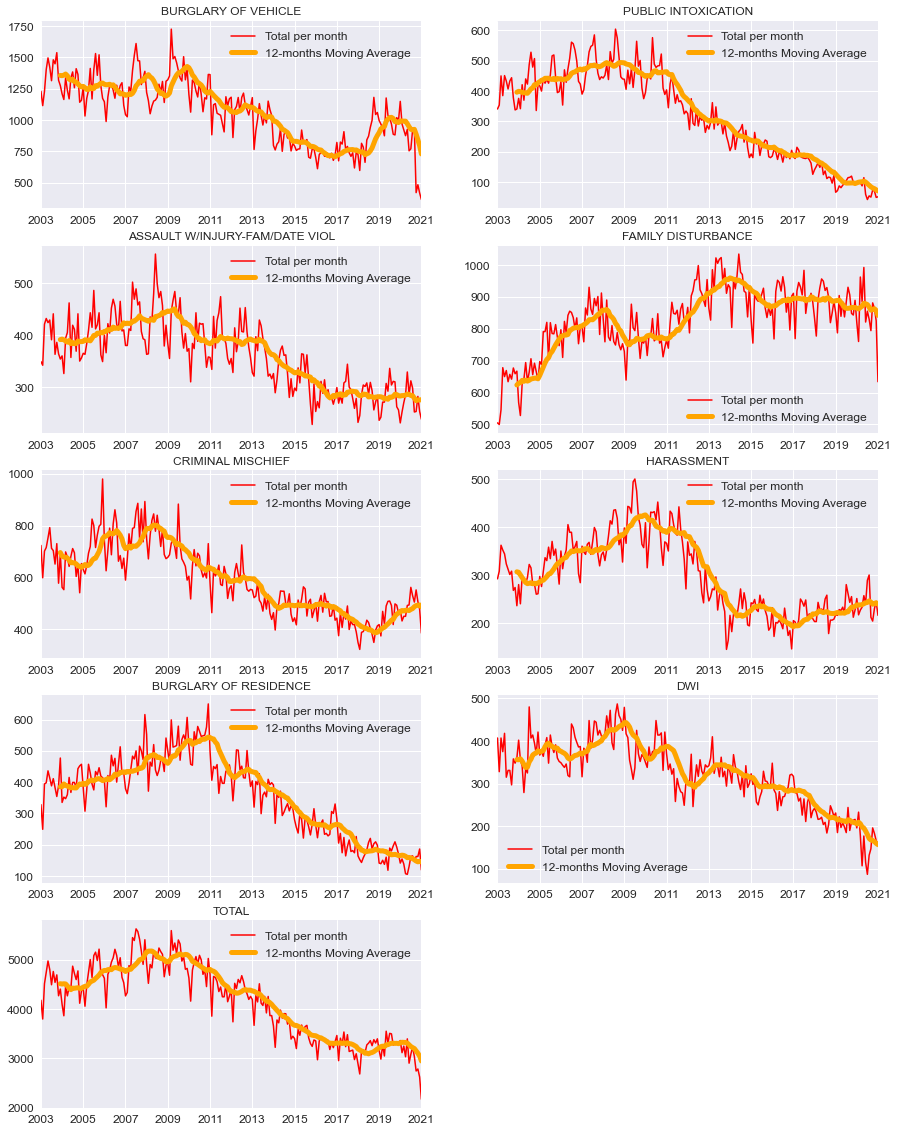

In [26]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17149
THEFT                             15774
BURGLARY OF VEHICLE                9264
WARRANT ARREST NON TRAFFIC         8966
DWI                                8324
ASSAULT WITH INJURY                7531
VIOL CITY ORDINANCE - OTHER        6187
POSS OF DRUG PARAPHERNALIA         6037
CRIMINAL MISCHIEF                  5818
CRIMINAL TRESPASS                  3916
POSSESSION OF MARIJUANA            3383
DISTURBANCE - OTHER                3351
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2898
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2589
CRIMINAL TRESPASS/TRANSIENT        2584
THEFT OF BICYCLE                   2509
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2160
DOC FIGHTING                       2109
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1728
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101758
THEFT                             0.093599
BURGLARY OF VEHICLE               0.054970
WARRANT ARREST NON TRAFFIC        0.053202
DWI                               0.049393
ASSAULT WITH INJURY               0.044687
VIOL CITY ORDINANCE - OTHER       0.036712
POSS OF DRUG PARAPHERNALIA        0.035822
CRIMINAL MISCHIEF                 0.034523
CRIMINAL TRESPASS                 0.023237
POSSESSION OF MARIJUANA           0.020074
DISTURBANCE - OTHER               0.019884
CUSTODY ARREST TRAFFIC WARR       0.017760
POSS CONTROLLED SUB/NARCOTIC      0.017196
CAMPING IN PARK                   0.016526
VOCO - ALCOHOL  CONSUMPTION       0.015962
ASSAULT BY CONTACT                0.015363
CRIMINAL TRESPASS/TRANSIENT       0.015333
THEFT OF BICYCLE                  0.014888
URINATING IN PUBLIC PLACE         0.013861
FAMILY DISTURBANCE                0.012817
DOC FIGHTING                      0.012514
PROTECTIVE ORDER                  0.012455
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

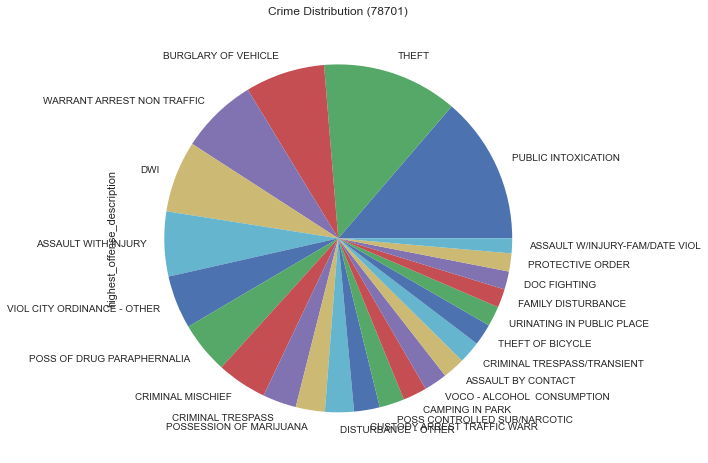

In [9]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### C. Question 2. How is crime distributed in 78753? 

THEFT                             17146
BURGLARY OF VEHICLE               15940
FAMILY DISTURBANCE                14672
CRIMINAL MISCHIEF                  9471
THEFT BY SHOPLIFTING               7637
ASSAULT W/INJURY-FAM/DATE VIOL     7159
BURGLARY OF RESIDENCE              6069
DWI                                5017
DISTURBANCE - OTHER                4768
CUSTODY ARREST TRAFFIC WARR        4348
HARASSMENT                         4256
AUTO THEFT                         4230
POSS OF DRUG PARAPHERNALIA         3725
PUBLIC INTOXICATION                3369
ASSAULT WITH INJURY                3308
CRIMINAL TRESPASS                  3141
POSS CONTROLLED SUB/NARCOTIC       2974
RUNAWAY CHILD                      2934
WARRANT ARREST NON TRAFFIC         2795
POSSESSION OF MARIJUANA            2707
BURGLARY NON RESIDENCE             2486
VIOL CITY ORDINANCE - OTHER        1866
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

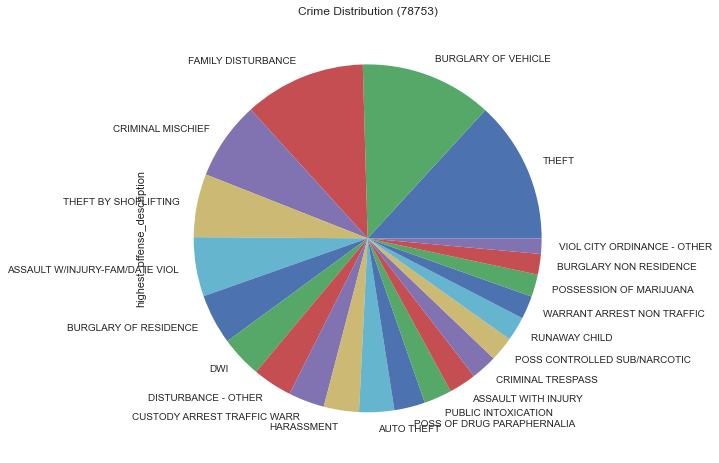

In [10]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### D. Question 4. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20358
BURGLARY OF VEHICLE               19808
THEFT                             15605
CRIMINAL MISCHIEF                 11053
ASSAULT W/INJURY-FAM/DATE VIOL     9626
BURGLARY OF RESIDENCE              8881
PUBLIC INTOXICATION                6381
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5661
HARASSMENT                         5519
DISTURBANCE - OTHER                5167
AUTO THEFT                         4631
ASSAULT WITH INJURY                4537
CRIMINAL TRESPASS                  3920
POSS CONTROLLED SUB/NARCOTIC       3863
POSSESSION OF MARIJUANA            3792
THEFT BY SHOPLIFTING               3575
POSS OF DRUG PARAPHERNALIA         3538
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2793
VIOL CITY ORDINANCE - OTHER        2195
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098352
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

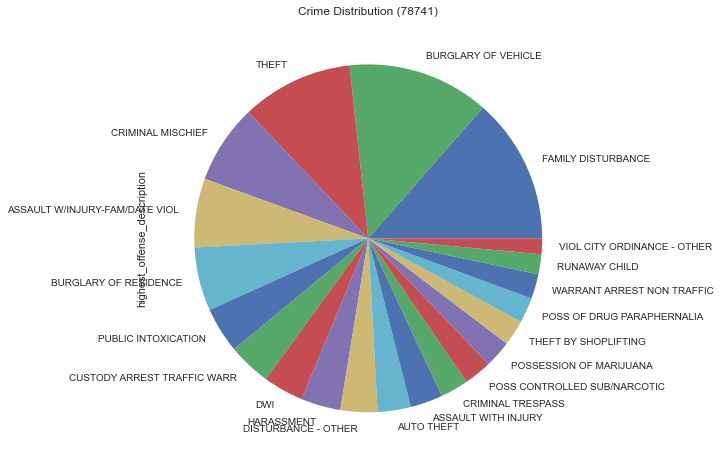

In [11]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### E. Question 5. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                14944
BURGLARY OF VEHICLE               14744
THEFT                             13569
CRIMINAL MISCHIEF                  8520
BURGLARY OF RESIDENCE              5869
ASSAULT W/INJURY-FAM/DATE VIOL     5758
HARASSMENT                         5147
DISTURBANCE - OTHER                4518
DWI                                4423
PUBLIC INTOXICATION                3997
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2876
AUTO THEFT                         2852
ASSAULT WITH INJURY                2672
RUNAWAY CHILD                      2601
POSSESSION OF MARIJUANA            2588
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2020
THEFT BY SHOPLIFTING               1986
CRIMINAL TRESPASS                  1955
IDENTITY THEFT                     1583
POSS OF DRUG PARAPHERNALIA         1518
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

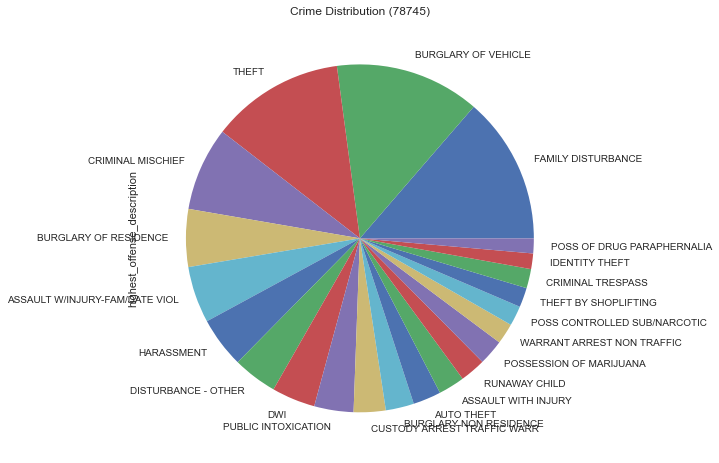

In [12]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### F. Question 6. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8626
THEFT                             5611
CRIMINAL MISCHIEF                 4968
THEFT OF BICYCLE                  3482
PUBLIC INTOXICATION               2628
BURGLARY OF RESIDENCE             2121
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1349
AUTO THEFT                        1314
ASSAULT WITH INJURY               1248
DWI                               1216
HARASSMENT                        1216
FAMILY DISTURBANCE                1190
DISTURBANCE - OTHER               1117
BURGLARY NON RESIDENCE             879
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        791
CUSTODY ARREST TRAFFIC WARR        782
GRAFFITI                           779
ASSAULT W/INJURY-FAM/DATE VIOL     691
POSSESSION OF MARIJUANA            659
ASSAULT BY CONTACT                 617
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150820
THEFT                             0.098105
CRIMINAL MISCHIEF                 0.086862
THEFT OF BICYCLE                  0.060881
PUBLIC INTOXICATION               0.045949
BURGLARY OF RESIDENCE             0.037084
WARRANT ARREST NON TRAFFIC        0.027101
CRIMINAL TRESPASS                 0.023586
AUTO THEFT                        0.022974
ASSAULT WITH INJURY               0.021820
DWI                               0.021261
HARASSMENT                        0.021261
FAMILY DISTURBANCE                0.020806
DISTURBANCE - OTHER               0.019530
BURGLARY NON RESIDENCE            0.015369
CRIMINAL TRESPASS/TRANSIENT       0.015176
VIOL CITY ORDINANCE - OTHER       0.013830
CUSTODY ARREST TRAFFIC WARR       0.013673
GRAFFITI                          0.013620
ASSAULT W/INJURY-FAM/DATE VIOL    0.012082
POSSESSION OF MARIJUANA           0.011522
ASSAULT BY CONTACT                0.010788
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

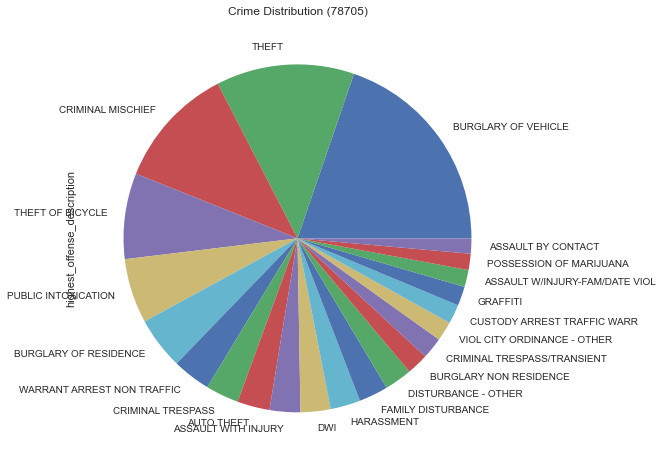

In [13]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

### Question 7. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5385
THEFT                             5088
THEFT BY SHOPLIFTING              2544
CRIMINAL MISCHIEF                 1273
DWI                                881
FAMILY DISTURBANCE                 757
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         626
AUTO THEFT                         606
BURGLARY OF RESIDENCE              520
THEFT FROM PERSON                  462
DISTURBANCE - OTHER                432
IDENTITY THEFT                     429
BURGLARY NON RESIDENCE             356
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            326
PUBLIC INTOXICATION                320
POSSESSION OF MARIJUANA            298
FRAUD - OTHER                      280
SUSPICIOUS PERSON                  256
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                197
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191256
THEFT                             0.180707
THEFT BY SHOPLIFTING              0.090354
CRIMINAL MISCHIEF                 0.045212
DWI                               0.031290
FAMILY DISTURBANCE                0.026886
VIOL CITY ORDINANCE - OTHER       0.023157
HARASSMENT                        0.022233
AUTO THEFT                        0.021523
BURGLARY OF RESIDENCE             0.018469
THEFT FROM PERSON                 0.016409
DISTURBANCE - OTHER               0.015343
IDENTITY THEFT                    0.015237
BURGLARY NON RESIDENCE            0.012644
ASSAULT W/INJURY-FAM/DATE VIOL    0.012076
CRED CARD ABUSE - OTHER           0.011578
PUBLIC INTOXICATION               0.011365
POSSESSION OF MARIJUANA           0.010584
FRAUD - OTHER                     0.009945
SUSPICIOUS PERSON                 0.009092
CUSTODY ARREST TRAFFIC WARR       0.008773
WARRANT ARREST NON TRAFFIC        0.007920
ASSAULT WITH INJURY               0.006997
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

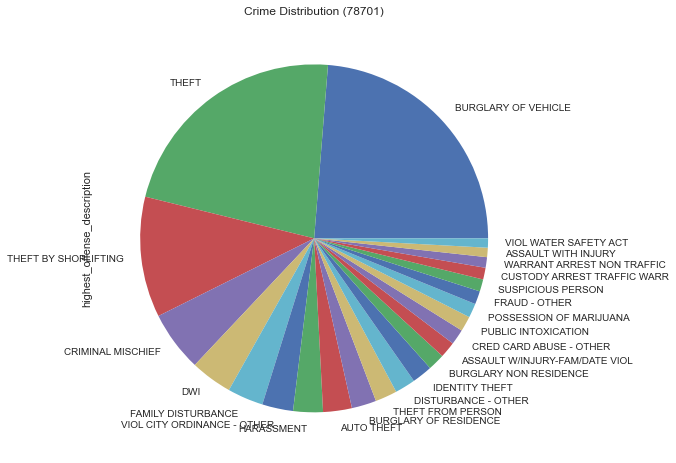

In [14]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q7'></a>
### H. Question 7. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [15]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130839
78753.0    0.098948
78758.0    0.094237
78701.0    0.074467
78723.0    0.074399
78702.0    0.074160
78745.0    0.057737
78752.0    0.052411
78744.0    0.052035
78704.0    0.048518
78721.0    0.028032
78724.0    0.024515
78705.0    0.021408
78757.0    0.020793
78748.0    0.017516
78751.0    0.017106
78759.0    0.013623
78722.0    0.009424
78754.0    0.008297
78727.0    0.007921
78749.0    0.007819
78617.0    0.007751
78729.0    0.007068
78750.0    0.005702
78731.0    0.005258
Name: zip_code, dtype: float64

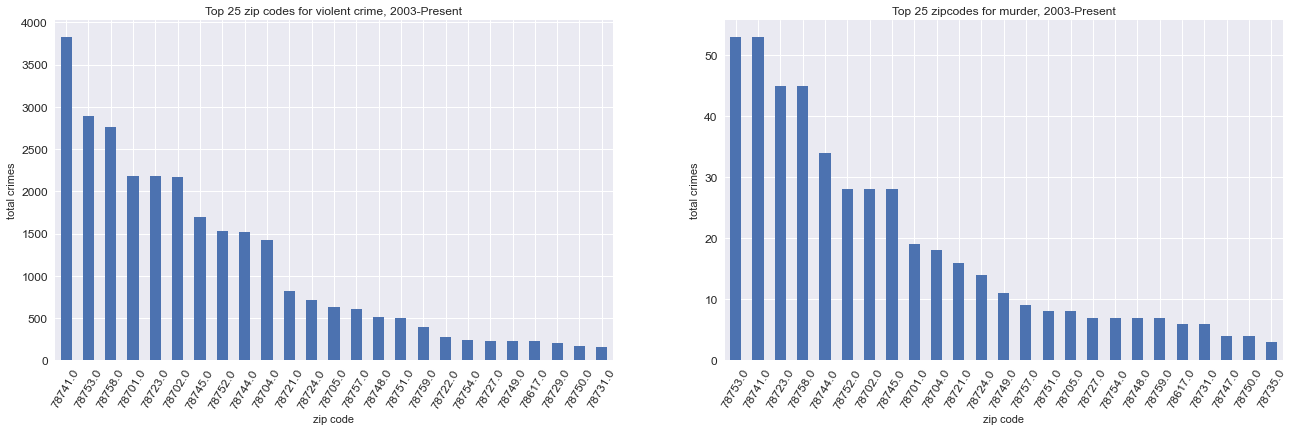

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

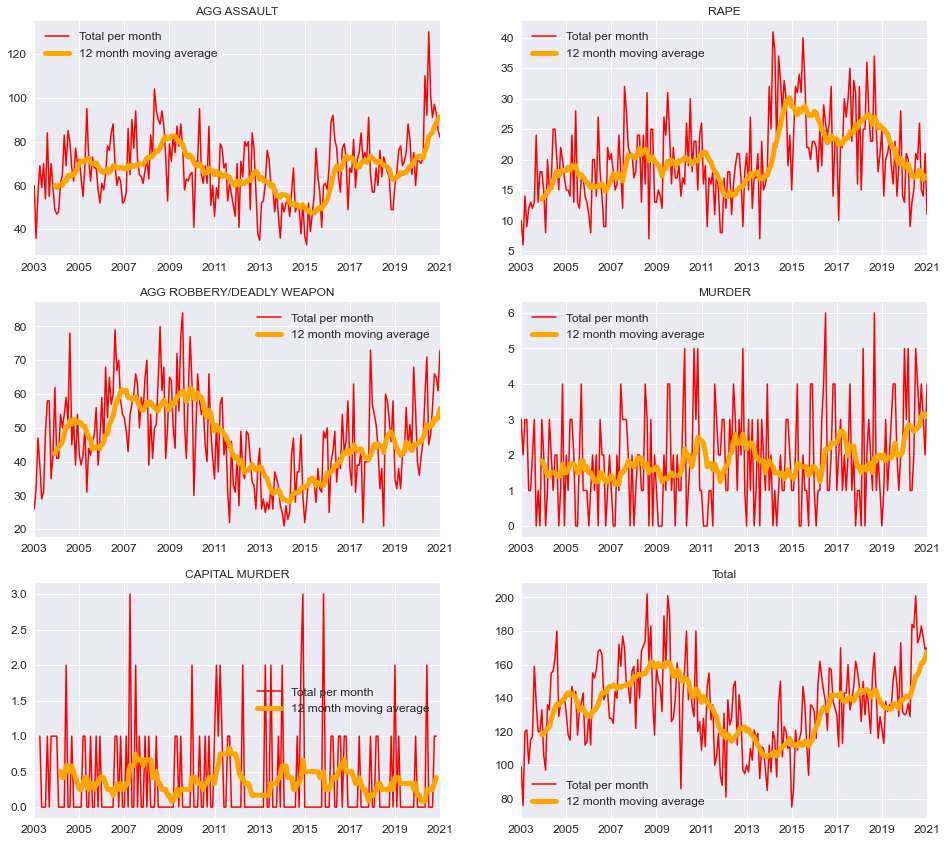

In [16]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

#### Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

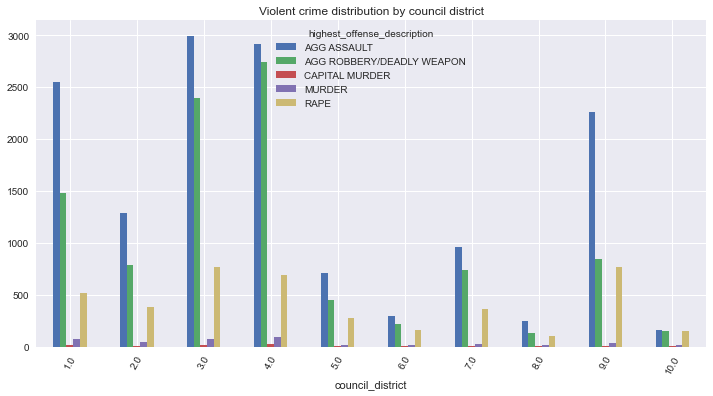

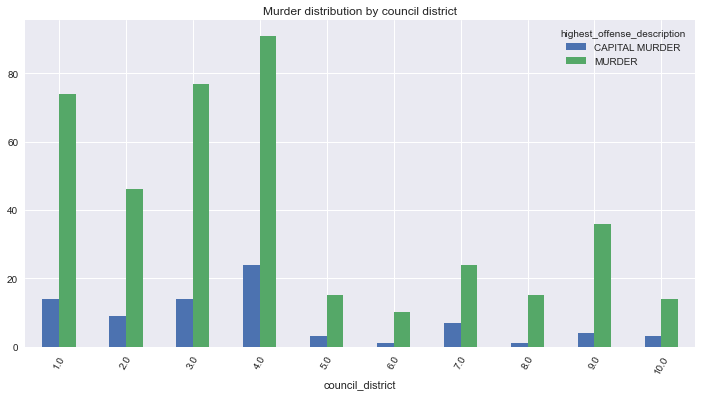

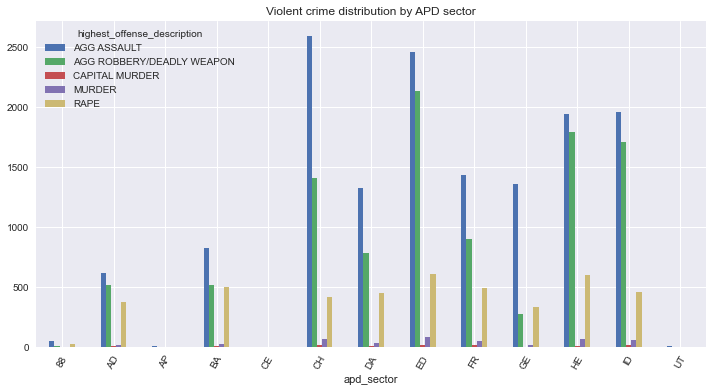

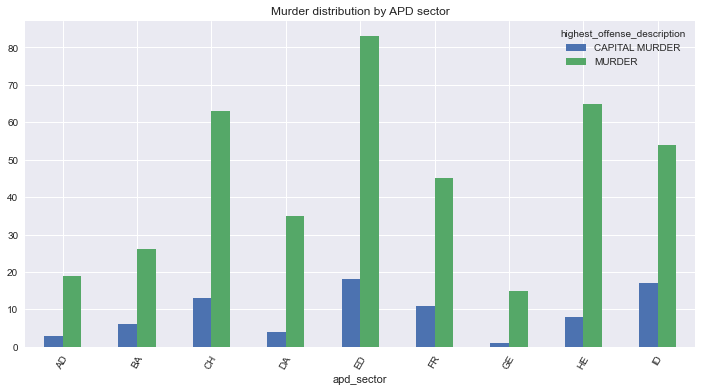

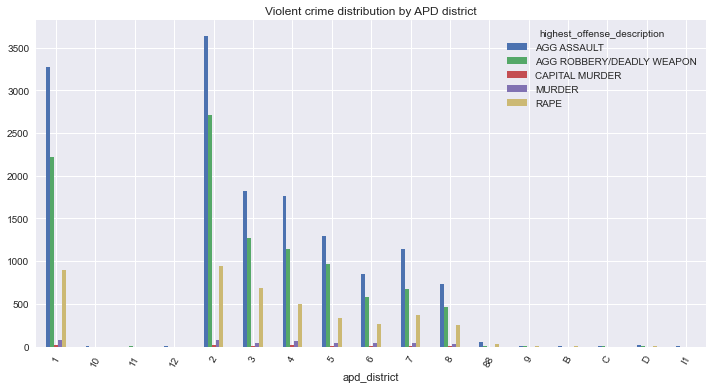

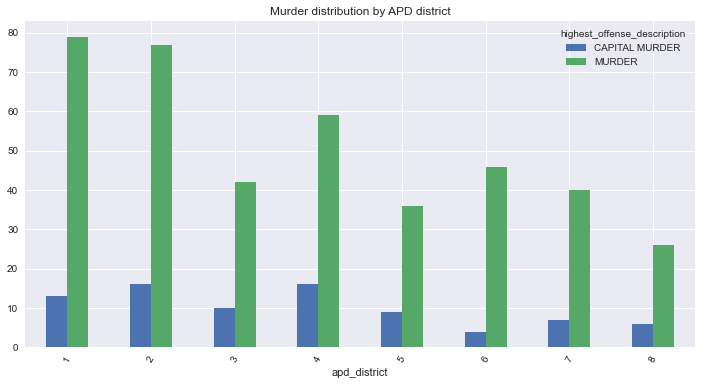

In [17]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

#### Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,2,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,133,0,1,1
BAR / NIGHT CLUB,655,45,2,7,78
CAMP / CAMPGROUND,21,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


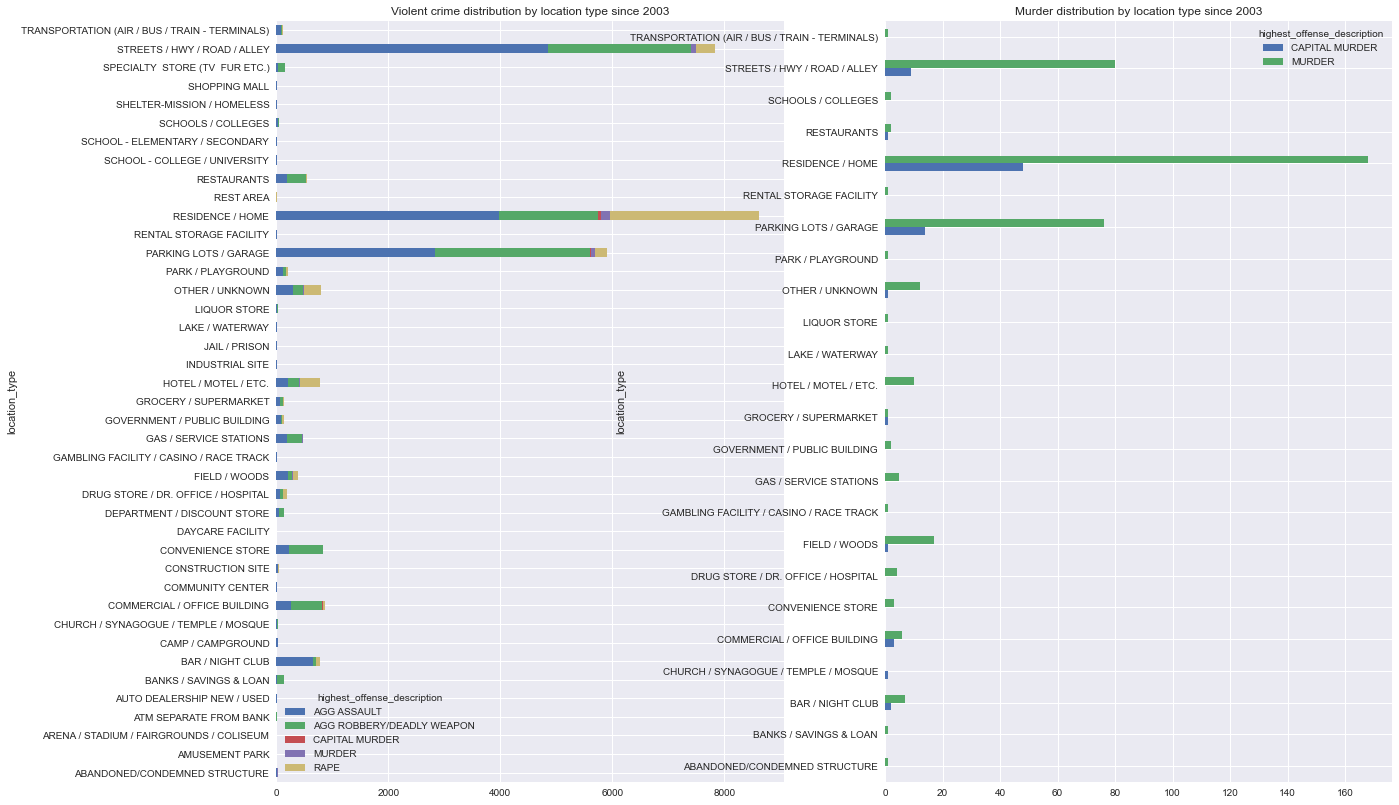

In [18]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### I. Question 9. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [19]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [20]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [21]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### J. Question 10. Are there any addresses where violent crime and murder occurs frequently?

In [22]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
6409 SPRINGDALE RD          59
00 BLOCK UNKNOWN            59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         54
1071 CLAYTON LN             53
9200 NORTH PLZ              53
1030 NORWOOD PARK BLVD      53
2237 E RIVERSIDE DR         51
1137 GUNTER ST              51
1124 RUTLAND DR             50
Name: address, dtype: int64

In [23]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

8800 N IH 35 SVRD SB         3
6409 SPRINGDALE RD           3
6407 SPRINGDALE RD           3
4700 E RIVERSIDE DR          3
8610 N LAMAR BLVD            3
2713 S CONGRESS AVE          2
7000 DECKER LN               2
9220 N IH 35 SVRD SB         2
201 W 5TH ST                 2
10610 MORADO CIR             2
2915 S IH 35 SVRD NB         2
2501 ANKEN DR                2
605 MASTERSON PASS           2
8912 N LAMAR BLVD            2
833 FAIRFIELD DR             2
2400 WICKERSHAM LN           2
815 W SLAUGHTER LN           2
9200 NORTH PLZ               2
601 E 15TH ST                2
1050 SPRINGDALE RD           2
6118 FAIRWAY ST              2
1711 RUTLAND DR              2
2508 E RIVERSIDE DR          2
9010 GALEWOOD DR             2
1137 GUNTER ST               2
8225 SAM RAYBURN DR          2
744 W WILLIAM CANNON DR      2
9601 MIDDLE FISKVILLE RD     2
10503 N LAMAR BLVD           2
6600 ED BLUESTEIN BLVD SB    2
Name: address, dtype: int64

In [24]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")